# Sentiment Prediction on IMDB 

**The Plan**

Compare `CountVectorizer` to `Doc2Vec` using 2-3 different classifiers models to predict movie review sentiment label. 
- Logistic Regression 
- SVM
- Random Forest

## import packages 

In [39]:
import pandas as pd
from time import time
import sys
sys.path.append("/Users/lesleymi/data_science_tutorials/IMDB_Sentiment_Analysis/src")
import imdb_functions as imdb

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# evaluation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

## load data 

### train

In [40]:
# load extracted doc2vec vectors 
X_train = pd.read_csv("data/train_d2v.csv").drop(labels='Unnamed: 0', axis=1)
y_train = pd.read_csv('data/Train.csv').label

In [41]:
X_train.head(2)

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
0,0.269958,0.847406,2.714277,-2.765047,0.373950,-0.494348,0.817959,-0.402494,-3.530908,0.710748,...,1.506851,-0.538074,3.387396,0.259887,-3.457242,-1.270991,0.535235,2.091433,0.851161,1.137199
1,2.603584,0.541296,1.023834,2.453051,-1.995571,-1.946021,0.777122,-2.054727,-3.207275,-0.990673,...,-2.703269,-1.207402,2.633590,1.170781,-4.261691,1.330964,-2.507479,-0.525997,0.594963,-1.341612


### validation 

In [42]:
# load d2v vectors for valid set 
X_valid = pd.read_csv("data/valid_d2v.csv").drop(labels='Unnamed: 0', axis=1)
y_valid = pd.read_csv("data/Valid.csv").label

In [43]:
X_valid.head(2)

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_90,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99
0,-4.066204,2.594942,-4.245735,4.462601,8.635210,-0.924835,7.683443,0.952837,3.264279,1.862702,...,4.318605,2.561746,1.066731,-3.686950,-3.049759,-6.981318,-10.714000,-6.041323,3.319085,-6.274211
1,-3.841133,-1.201610,-2.256248,0.559345,4.665877,-4.756668,3.231162,-0.455631,-0.486202,-1.635700,...,3.377770,0.079804,-0.620363,-0.342946,0.660628,-2.027951,-2.596628,-1.875848,0.706689,2.000733


## Logistic Regression 


### train set 

In [44]:
start = time()
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for logistic regression... {} seconds".format(round(stop - start, 2)))

training time for logistic regression... 0.23 seconds


In [45]:
acc = round(lr.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 86.0 %


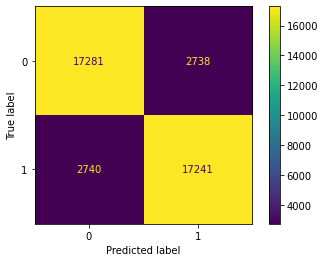

In [46]:
### confusion matrix
plot_confusion_matrix(estimator=lr, X=X_train, y_true=y_train)

In [47]:
# get model predictions 
y_pred = lr.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
metrics

(array([0.8631437, 0.8629561]),
 array([0.86322993, 0.86286973]),
 array([0.86318681, 0.86291291]),
 array([20019, 19981]))

In [48]:
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.863144,0.862956
recall,0.863230,0.862870
f1_score,0.863187,0.862913
count_of_reviews,20019.000000,19981.000000


### validation set 

In [49]:
acc = round(lr.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 79.0 %


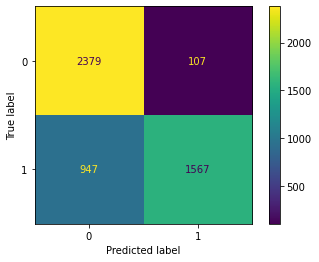

In [50]:
### confusion matrix
plot_confusion_matrix(estimator=lr, X=X_valid, y_true=y_valid)

In [51]:
y_valid_pred = lr.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.715274,0.936081
recall,0.956959,0.623309
f1_score,0.818651,0.748329
count_of_reviews,2486.000000,2514.000000


### Summary 
**Logistic regression** 

For **negative** reviews, the precision is 72% meaning that when the classifier predicts the positive label, it correctly identifies the negative review 72% of the time. The recall is much higher at 95%. Out of the truly negative reviews, the classifier correctly identifies them 95% of the time. 

For **positive** reviews, the precision is much higher at ~ 93%. But the recall is much lower at 64% meaning that out of the positive reviews, the classifier correctly identifies that it is positive 64% of the time. 

F1 score for **negative** reviews is 82% and the F1 score for **positive** reviews is ~ 76%. So overall, before any hyperparameter tuning, the `Logistic Regression` model performs better at identifying **negative** reviews. 

## Support Vector Machine 



### train set 

In [52]:
start = time()
svc = SVC(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for support vector machine: {} seconds.".format(round((stop - start), 2)))

training time for support vector machine: 211.21 seconds.


In [53]:
train_time = round((stop - start)/60, 2)
print('training time for support vector machine: {} minutes.'.format(train_time))

training time for support vector machine: 3.52 minutes.


**Note:**

**The train accuracy score and the plot of the confusion matrix each took a few minutes each to compute! In contrast to logistic regression which was practically instantaneous.**

In [54]:
acc = round(svc.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 93.0 %


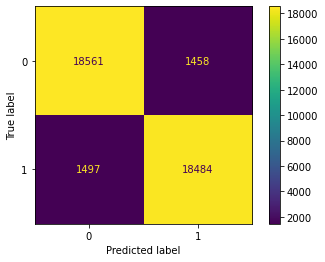

In [55]:
### confusion matrix
plot_confusion_matrix(estimator=svc, X=X_train, y_true=y_train)

In [56]:
# get model predictions 
y_pred = svc.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.925366,0.926888
recall,0.927169,0.925079
f1_score,0.926267,0.925983
count_of_reviews,20019.000000,19981.000000


### validation set 

In [57]:
acc = round(svc.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 78.0 %


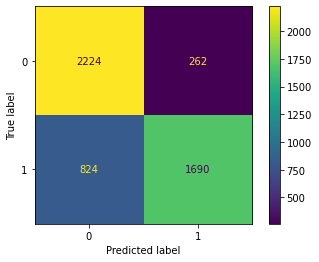

In [58]:
### confusion matrix
plot_confusion_matrix(estimator=svc, X=X_valid, y_true=y_valid)

In [59]:
y_valid_pred = svc.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.729659,0.865779
recall,0.894610,0.672235
f1_score,0.803759,0.756829
count_of_reviews,2486.000000,2514.000000


### Summary 

Without any hyperparameter tuning `SVC` performs even better on the train set than `Logistic Regression` but even worse on the validation. There is a big gap in the accuracy between train and validation which indicates overfitting. But this model would probably benefit greatly from tuning. 

For the **Negative** reviews, the `SVC` has worse precision but slightly higher recall. For **Positive** reviews the precision is the same as before but the recall is far far worse (64% for LR vs 47% for SVC). 

SVC is still performing better on negative reviews over positive reviews but it performs worse on the validation set than `Logistic Regression`. However, the model needs a tuning before I'd really be able to compare fairly. 

## Random Forest

### train set 

In [60]:
start = time()
rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
stop = time()
print("training time for random forest: {} seconds.".format(round((stop - start), 2)))

training time for random forest: 75.48 seconds.


In [61]:
acc = round(rf.score(X_train, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 100.0 %


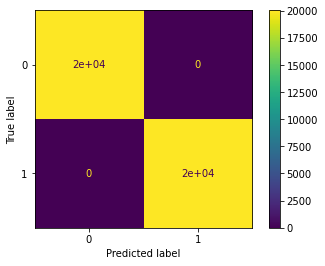

In [62]:
### confusion matrix
plot_confusion_matrix(estimator=rf, X=X_train, y_true=y_train)

In [63]:
# get model predictions 
y_pred = rf.predict(X_train)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,1.0,1.0
recall,1.0,1.0
f1_score,1.0,1.0
count_of_reviews,20019.0,19981.0


### validation set 

In [64]:
acc = round(rf.score(X_valid, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 69.0 %


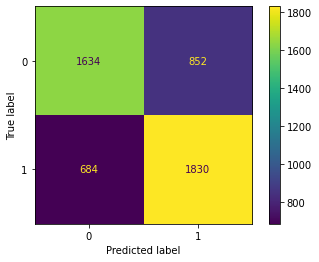

In [65]:
### confusion matrix
plot_confusion_matrix(estimator=rf, X=X_valid, y_true=y_valid)

In [66]:
y_valid_pred = rf.predict(X_valid)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_valid_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.704918,0.682327
recall,0.657281,0.727924
f1_score,0.680266,0.704388
count_of_reviews,2486.000000,2514.000000


### Summary 
Off the shelf, the `Random Forest` is performing more equally on the **positive** vs **negative** reviews. Overall, it performs slighly better on **positive reviews** than **negative** reviews.

Compared to `SVC` it is performing quite a bit worse in general but again hyperparameter tuning should improve it as currently the `Random Forest` model is severely overfitting.  